In [78]:
import os
os.environ['R_HOME'] = '/data1/lesliec/sneha/anaconda/envs/crc-env/lib/R'
from rpy2.rinterface_lib import openrlib
openrlib.R_HOME = '/data1/lesliec/sneha/anaconda/envs/crc-env/lib/R'
import scanpy as sc
import numpy as np
import anndata as ad
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%load_ext rpy2.ipython

In [69]:
%%R
library(survival)
library(survminer)

In [70]:
%%R
s.tbl <- read.csv('./data/surv_table_Treg.csv', sep='\t')

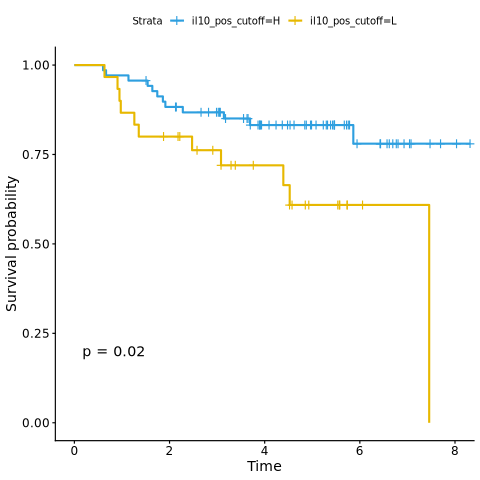

In [71]:
%%R
sfit_il10_pos_genes <- survfit(Surv(DFS_time, DFS_Status)~il10_pos_cutoff, data=s.tbl[!is.na(s.tbl$DFS_time),])
p <- ggsurvplot(sfit_il10_pos_genes, conf.int=FALSE, pval=TRUE, palette = c("#2E9FDF", "#E7B800"))
p

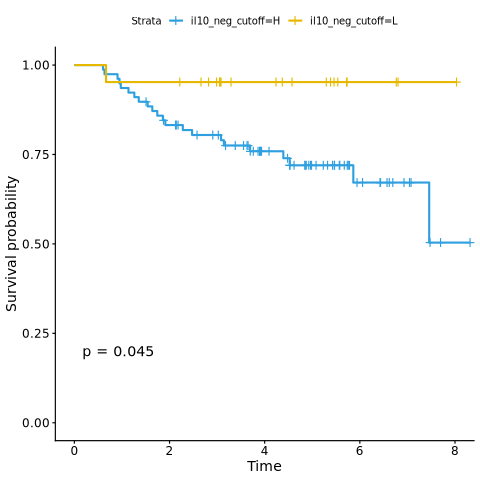

In [72]:
%%R
sfit_il10_neg_genes <- survfit(Surv(DFS_time, DFS_Status)~il10_neg_cutoff, data=s.tbl[!is.na(s.tbl$DFS_time),])
p <- ggsurvplot(sfit_il10_neg_genes, conf.int=FALSE, pval=TRUE, palette = c("#2E9FDF", "#E7B800"))
p

In [73]:
adata_flex = sc.read_h5ad('./data/flex_10x.h5ad')

In [74]:
adata_flex_T = adata_flex[adata_flex.obs['celltype'].isin(['CD4 memory', 'IL10+ Treg', 'IL10- Treg', 
                                                            'ILCTKs', 'PD1+ CD4', 'PD1+ CD8', 'Tfh', 
                                                            'Th17', 'gdT'])].copy()

In [92]:
from gseapy import Biomart
bm = Biomart()
# note the dataset and attribute names are different
m2h = bm.query(dataset='mmusculus_gene_ensembl',
               attributes=['ensembl_gene_id','external_gene_name',
                           'hsapiens_homolog_ensembl_gene',
                           'hsapiens_homolog_associated_gene_name'])

m2h_d = {}
for i,r in m2h.iterrows():
    if r['hsapiens_homolog_associated_gene_name'] is None: continue
    m2h_d[r['external_gene_name']] = r['hsapiens_homolog_associated_gene_name']

hotspot_mouse_genes_1 = ['Ikzf2', 'Il1rl1', 'Gata3', 'Rel', 'Tox', 'Flnb', 'Tnfrsf9', 'Nfkb1',
       'Tent5a', 'Tmtc2', 'Epas1', 'Rora', 'Il18rap', 'Klrg1', 'Cd83', 'Mgat5',
       'Dgat2', 'Swap70', 'Myo1e', 'Ikzf4', 'Tspan13', 'Dusp10', 'Pdcd1',
       'Gm28112', 'Stat4', 'Pcgf5']

hotspot_mouse_genes_2 = ['Pkp4', 'Zbtb46', 'Ly75', 'Itgb8', 'Ttn', 'Pcyt1a', 'Gda', 'Il2ra',
       'Uap1', 'Zc3h12c', 'Il18r1', 'Epb41l2', 'Traf3', 'Cep85l', 'Rbpj',
       'Stat1', 'Itgav', 'Ankrd33b', 'Bcl2l1', 'Fam129a', 'Ttc39c', 'Ap3b1',
       'Ppp1r16b', 'Myo10', 'Apaf1', 'Itga4', 'Rnf157', 'Nrip1']
hotspot_mouse_genes_Il10 = ['Il10', 'Maf', 'Ctla4', 'Ccr2', 'Nckap5', 'Ece1', 'Zeb2', 'Itm2b',
       'Ikzf3', 'Rabgap1l', 'Icos', 'Havcr2', 'Gzmb', 'Lag3', 'Gm36975', 'Neb',
       'Gas2', 'Cytip', 'Galnt2', 'Ccr5', 'Il1r1', 'Pde4b', 'Gcnt2', 'Olfr60',
       'Lrrfip2', '4930503L19Rik', 'E130308A19Rik', 'Gm13481', 'Ccr1',
       'Atp10a', 'Snx9', 'Gm49890', 'Agfg1', 'Ppp1r14c', 'Tiparp', 'Il23r',
       'Matn2', 'Rgs1', 'Fmnl2', 'Phactr2', 'Farp1', 'Irak3', 'Eea1',
       'Ubash3b', 'St6galnac3', 'Lamc1', 'Got1', 'Smap2', 'Wdfy2', 'Rbm24',
       'Ston2', 'Adam12', 'Twsg1', 'Hnrnpll', 'Ets2', 'Timp2', 'Dock10',
       'Ier5l', 'Arl4c']
hotspot_mouse_genes_Il10_2 = ['Nckap5', 'Ece1', 'Zeb2', 'Rabgap1l', 'Havcr2', 'Gzmb', 'Lag3',
       'Gm36975', 'Gas2', 'Il1r1', 'Pde4b', 'Gcnt2', 'Olfr60', '4930503L19Rik',
       'Lrrfip2', 'E130308A19Rik', 'Gm13481', 'Ccr1', 'Atp10a', 'Gm49890',
       'Ppp1r14c', 'Tiparp', 'Il23r', 'Matn2', 'Farp1', 'Phactr2', 'Irak3',
       'Eea1', 'St6galnac3', 'Smap2', 'Wdfy2', 'Rbm24', 'Adam12', 'Twsg1',
       'Ets2', 'Hnrnpll', 'Timp2']

hotspot_mouse_genes_1 = [m2h_d[x] if x in m2h_d else None for x in hotspot_mouse_genes_1]
hotspot_mouse_genes_2 = [m2h_d[x] if x in m2h_d else None for x in hotspot_mouse_genes_2]
hotspot_mouse_genes = hotspot_mouse_genes_1 + hotspot_mouse_genes_2
hotspot_mouse_genes_Il10 = [m2h_d[x] if x in m2h_d else None for x in hotspot_mouse_genes_Il10]
hotspot_mouse_genes_Il10_2 = [m2h_d[x] if x in m2h_d else None for x in hotspot_mouse_genes_Il10_2]
hotspot_mouse_genes_Il10 = hotspot_mouse_genes_Il10 + hotspot_mouse_genes_Il10_2

In [93]:
adata_tmp = adata_flex_T[adata_flex_T.obs['celltype'].isin(['IL10+ Treg', 'IL10- Treg', 'PD1+ CD4'])].copy()
sc.pp.filter_genes(adata_tmp, min_cells=50)
sc.tl.score_genes(adata_tmp, gene_list=adata_tmp.var_names[adata_tmp.var_names.isin(hotspot_mouse_genes)], 
                  score_name='mouse_module_il10_neg', n_bins=10)
sc.tl.score_genes(adata_tmp, gene_list=adata_tmp.var_names[adata_tmp.var_names.isin(hotspot_mouse_genes_Il10)], 
                  score_name='mouse_module_il10_pos', n_bins=10)

(-0.09, 0.45)

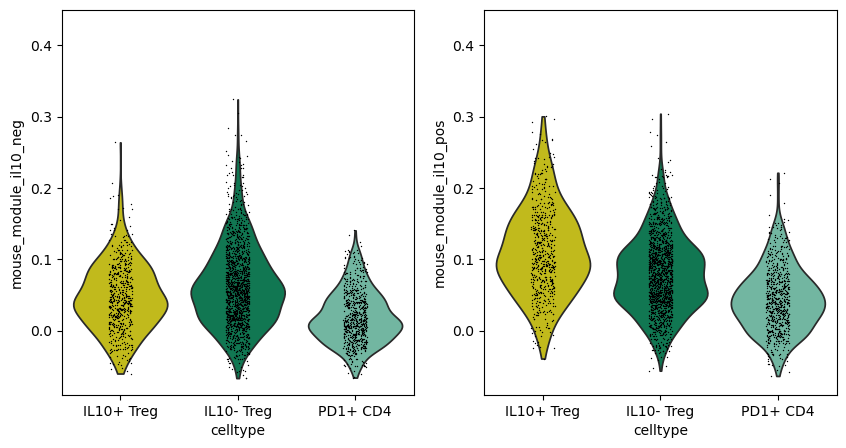

In [94]:
fig,ax = plt.subplots(1, 2, figsize=(10,5))

sc.pl.violin(adata_flex_T[adata_flex_T.obs['celltype'].isin(['IL10+ Treg', 'IL10- Treg', 
                                                             'PD1+ CD4'])], 
             'mouse_module_il10_neg', groupby='celltype', ax=ax[0], show=False)
sc.pl.violin(adata_flex_T[adata_flex_T.obs['celltype'].isin(['IL10+ Treg', 'IL10- Treg', 
                                                             'PD1+ CD4'])], 
             'mouse_module_il10_pos', groupby='celltype', ax=ax[1], show=False)
ax[0].set_ylim((-0.09, 0.45))
ax[1].set_ylim((-0.09, 0.45))
